In [ ]:
!pip install -q numpy pandas matplotlib seaborn nltk scikit-learn wordcloud


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download("punkt")
nltk.download("stopwords")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!mkdir -p /content/news20dataset


In [ ]:
!unzip newsdataset.zip -d /content/news20dataset

Archive:  newsdataset.zip
  inflating: /content/news20dataset/alt.atheism.txt  
  inflating: /content/news20dataset/comp.graphics.txt  
  inflating: /content/news20dataset/comp.os.ms-windows.misc.txt  
  inflating: /content/news20dataset/comp.sys.ibm.pc.hardware.txt  
  inflating: /content/news20dataset/comp.sys.mac.hardware.txt  
  inflating: /content/news20dataset/comp.windows.x.txt  
  inflating: /content/news20dataset/list.csv  
  inflating: /content/news20dataset/misc.forsale.txt  
  inflating: /content/news20dataset/rec.autos.txt  
  inflating: /content/news20dataset/rec.motorcycles.txt  
  inflating: /content/news20dataset/rec.sport.baseball.txt  
  inflating: /content/news20dataset/rec.sport.hockey.txt  
  inflating: /content/news20dataset/sci.crypt.txt  
  inflating: /content/news20dataset/sci.electronics.txt  
  inflating: /content/news20dataset/sci.med.txt  
  inflating: /content/news20dataset/sci.space.txt  
  inflating: /content/news20dataset/soc.religion.christian.txt  
 

In [ ]:
!ls /content/news20dataset


alt.atheism.txt		      rec.sport.hockey.txt
comp.graphics.txt	      sci.crypt.txt
comp.os.ms-windows.misc.txt   sci.electronics.txt
comp.sys.ibm.pc.hardware.txt  sci.med.txt
comp.sys.mac.hardware.txt     sci.space.txt
comp.windows.x.txt	      soc.religion.christian.txt
list.csv		      talk.politics.guns.txt
misc.forsale.txt	      talk.politics.mideast.txt
rec.autos.txt		      talk.politics.misc.txt
rec.motorcycles.txt	      talk.religion.misc.txt
rec.sport.baseball.txt


In [ ]:
DATA_DIR = "/content/news20dataset"

In [ ]:
documents = []
labels = []

for filename in os.listdir(DATA_DIR):
    filepath = os.path.join(DATA_DIR, filename)

    if not os.path.isfile(filepath):
        continue

    with open(filepath, "r", encoding="latin-1") as f:
        text = f.read()

        # Split documents (double newlines usually separate posts)
        docs = text.split("\n\n")

        for doc in docs:
            doc = doc.strip()
            if len(doc) > 50:  # ignore tiny noise chunks
                documents.append(doc)
                labels.append(filename)


In [ ]:
print("Total documents:", len(documents))
print("Unique topics:", set(labels))
print("Documents per topic:")
from collections import Counter
print(Counter(labels))


Total documents: 238817
Unique topics: {'comp.sys.ibm.pc.hardware.txt', 'misc.forsale.txt', 'list.csv', 'comp.os.ms-windows.misc.txt', 'sci.space.txt', 'comp.windows.x.txt', 'talk.politics.guns.txt', 'comp.sys.mac.hardware.txt', 'talk.politics.mideast.txt', 'sci.electronics.txt', 'comp.graphics.txt', 'alt.atheism.txt', 'rec.motorcycles.txt', 'talk.religion.misc.txt', 'talk.politics.misc.txt', 'sci.crypt.txt', 'rec.sport.hockey.txt', 'rec.sport.baseball.txt', 'rec.autos.txt', 'sci.med.txt', 'soc.religion.christian.txt'}
Documents per topic:
Counter({'talk.politics.mideast.txt': 17578, 'alt.atheism.txt': 17564, 'comp.graphics.txt': 16854, 'soc.religion.christian.txt': 14556, 'sci.crypt.txt': 14386, 'sci.space.txt': 13102, 'talk.politics.guns.txt': 13062, 'comp.windows.x.txt': 12746, 'sci.med.txt': 11688, 'rec.sport.hockey.txt': 11650, 'talk.politics.misc.txt': 11366, 'rec.sport.baseball.txt': 10438, 'rec.motorcycles.txt': 9732, 'comp.sys.ibm.pc.hardware.txt': 9670, 'sci.electronics.txt':

In [ ]:
from collections import Counter

topic_counts = Counter(labels)
topic_counts


Counter({'rec.autos.txt': 9408,
         'talk.politics.misc.txt': 11366,
         'alt.atheism.txt': 17564,
         'talk.politics.mideast.txt': 17578,
         'soc.religion.christian.txt': 14556,
         'talk.religion.misc.txt': 9110,
         'rec.sport.hockey.txt': 11650,
         'misc.forsale.txt': 8968,
         'talk.politics.guns.txt': 13062,
         'list.csv': 1,
         'sci.med.txt': 11688,
         'comp.sys.mac.hardware.txt': 8128,
         'sci.space.txt': 13102,
         'rec.motorcycles.txt': 9732,
         'sci.electronics.txt': 9414,
         'comp.os.ms-windows.misc.txt': 9396,
         'comp.graphics.txt': 16854,
         'rec.sport.baseball.txt': 10438,
         'comp.sys.ibm.pc.hardware.txt': 9670,
         'sci.crypt.txt': 14386,
         'comp.windows.x.txt': 12746})

In [ ]:
doc_lengths = [len(doc.split()) for doc in documents]

print("Average length:", sum(doc_lengths) / len(doc_lengths))
print("Min length:", min(doc_lengths))
print("Max length:", max(doc_lengths))


Average length: 44.40962745533191
Min length: 1
Max length: 7859


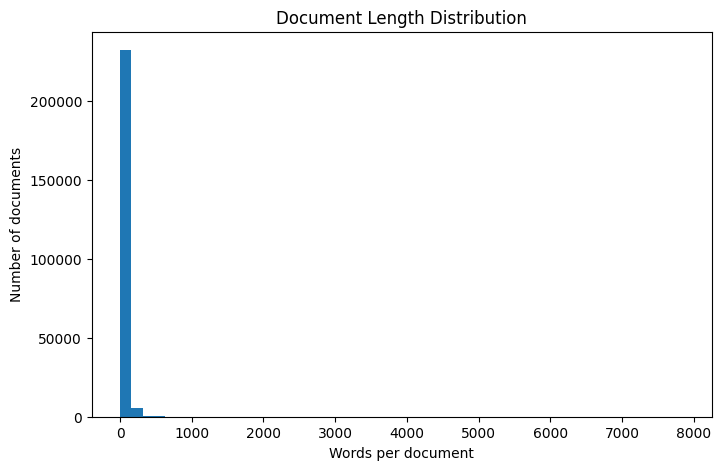

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(doc_lengths, bins=50)
plt.xlabel("Words per document")
plt.ylabel("Number of documents")
plt.title("Document Length Distribution")
plt.show()


Word Frequency Analysis

In [ ]:
#Tokenization & stopword removal
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))
tokens = []

for doc in documents:
    words = word_tokenize(doc.lower())
    words = [w for w in words if w.isalpha() and w not in stop_words]
    tokens.extend(words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Top Words
word_freq = Counter(tokens)
word_freq.most_common(20)


[('subject', 41931),
 ('newsgroup', 38910),
 ('would', 32556),
 ('one', 29480),
 ('writes', 25472),
 ('article', 23706),
 ('people', 19666),
 ('like', 19398),
 ('know', 17455),
 ('get', 16644),
 ('x', 16270),
 ('think', 15431),
 ('also', 14763),
 ('use', 13432),
 ('could', 13368),
 ('time', 12962),
 ('good', 11787),
 ('new', 11787),
 ('even', 11105),
 ('well', 10801)]

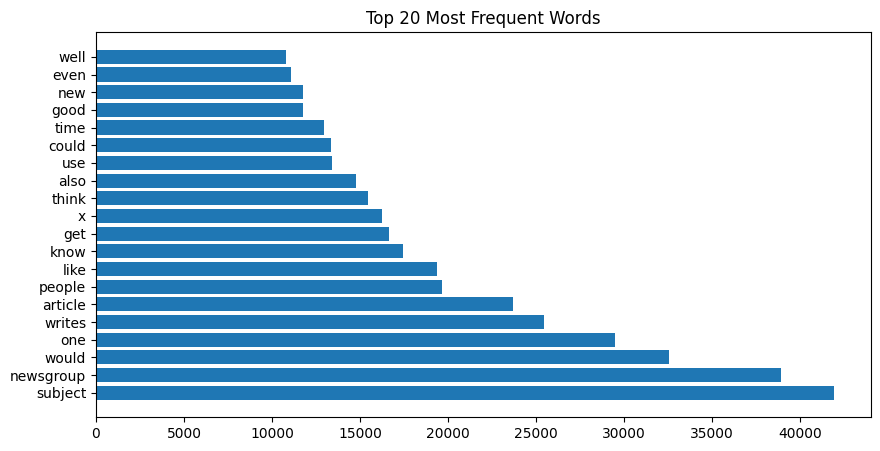

In [ ]:
words, counts = zip(*word_freq.most_common(20))

plt.figure(figsize=(10,5))
plt.barh(words, counts)
plt.title("Top 20 Most Frequent Words")
plt.show()


In [ ]:
import pandas as pd

df = pd.DataFrame({
    "text": documents,
    "topic": labels
})

df.to_csv("/content/20newsgroups_phase1.csv", index=False)


Why Topic Identification Is Harder Than Sentiment:
- Topics are not explicitly stated
- Words contribute probabilistically to multiple topics
- Requires global word co-occurrence patterns
- No ground truth during training